In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Asegurate que tienes la versión 1.3.5 de pandas, sino instala esa versión
pd.__version__

In [11]:
# Descargate el repositorio de github en Colab 
def is_running_in_colab():
    try:
        import google.colab
        return True
    except:
        return False
if is_running_in_colab():
    !rm -rf investigacion_senescyt
    !git clone https://github.com/mayait/investigacion_senescyt.git
    !mv /content/investigacion_senescyt/pickles_partes .

In [1]:
# Funcion que une los archivos pickle en un solo dataframe
def unir_pickle(nombre, n):
    lista_dataframes = []
    for i in range(n):
        df = pd.read_pickle(nombre + str(i) + '.pkl')
        lista_dataframes.append(df)
    df_unido = pd.concat(lista_dataframes, ignore_index=True)
    return df_unido

In [4]:
# Importa postrulaciones desde los pickles
postulaciones = unir_pickle('pickles_partes/postulaciones_',36)

In [5]:
# ELIMINAR CAE estado tiene todo en 1 o activado
postulaciones.drop(['CAE_ESTADO'], axis=1, inplace=True)

Limpiar año postulación

In [6]:
# Extrae los primeros 10 caracteres de la columna POS_FECHA_POSTULACION
postulaciones['ANO_POSTULACION'] = postulaciones['POS_FECHA_POSTULACION'].str[:10]
# Las fechas están en multiples formatos, extrae solo los ultimos 4 caracteres en ANO_POSTULACION
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].str[-4:]
# Convierte la columna a tipo numérico
postulaciones['ANO_POSTULACION'] = pd.to_numeric(postulaciones['ANO_POSTULACION'], errors='coerce')
# Si POS_FECHA_POSTULACION es menor a 100 suma 2000, algunos valores de año están como 19 o 20
postulaciones.loc[postulaciones['ANO_POSTULACION'] < 100, 'ANO_POSTULACION'] += 2000

In [7]:
postulaciones.ANO_POSTULACION.value_counts()

2021.0    2924995
2020.0    2338841
2019.0    1015301
Name: ANO_POSTULACION, dtype: int64

# Nota de postulación

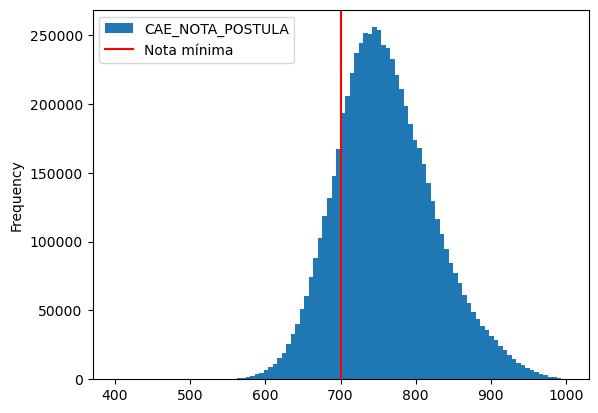

In [8]:
# Grafiquemos la distribución de los datos CAE_NOTA_POSTULA en postulaciones
postulaciones['CAE_NOTA_POSTULA'].plot.hist(bins=100)
# Pon una linea en 700 con la etiqueta nota minima
plt.axvline(700, color='red', label='Nota mínima')
plt.legend()
plt.show()